In [471]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [472]:
dir='C:\\Users\\S\\Desktop\\'
data=pd.read_csv(dir+"data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [473]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [474]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [475]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [476]:
data[['Name','Sex','Cabin','Ticket','Embarked']].describe()

,Name,Sex,Cabin,Ticket,Embarked
count,891,891,204,891,889
unique,891,2,147,681,3
top,"Sage, Mr. Frederick",male,G6,347082,S
freq,1,577,4,7,644


In [477]:
data[['Pclass','Survived']].groupby('Pclass').mean()#Pclass1's pessangers surviving more than 2 or 3

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [478]:
data[['Sex','Survived']].groupby('Sex').mean()# female passangers more survived than male

,Survived
Sex,
female,0.742038
male,0.188908


In [479]:
data[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [480]:
data[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


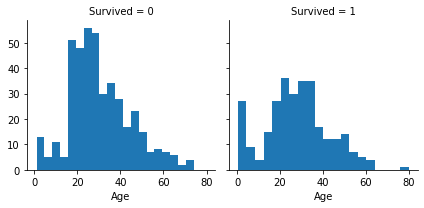

In [481]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\S\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


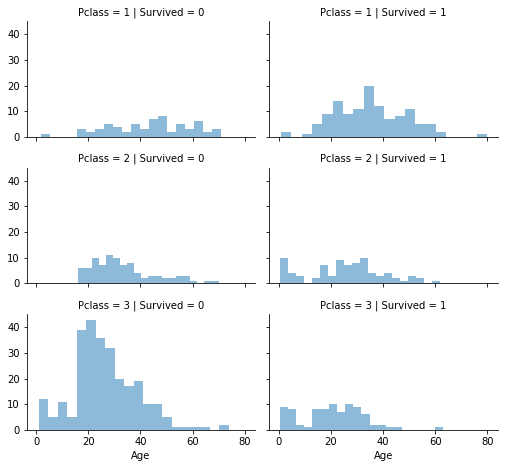

In [482]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

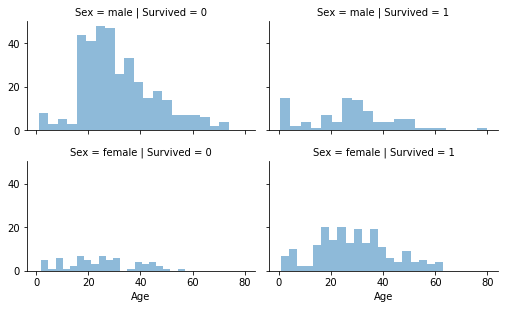

In [483]:
grid = sns.FacetGrid(data, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

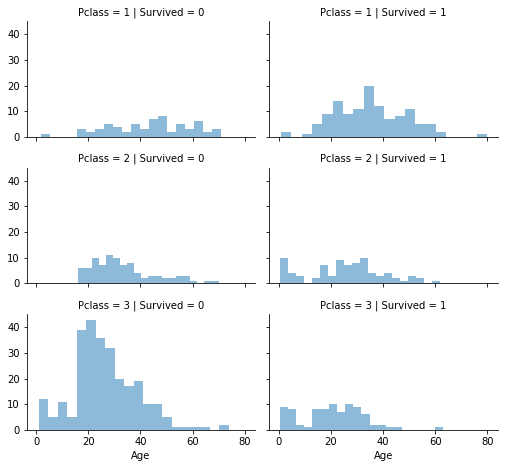

In [484]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\S\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


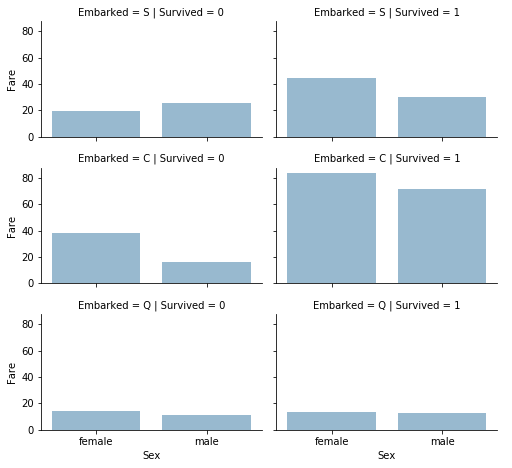

In [485]:
grid = sns.FacetGrid(data, col='Survived', row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=.5, ci=None)
grid.add_legend();

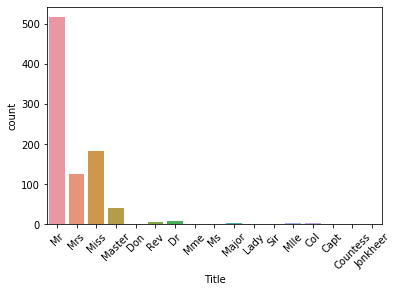

In [486]:
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [487]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Sir           1
Don           1
Jonkheer      1
Lady          1
Ms            1
Mme           1
Countess      1
Name: Title, dtype: int64

In [488]:
data['Title']=data['Title'].replace(['Dr','Rev','Major','Col','Mlle','Lady','Jonkheer','Don','Sir','Ms','Capt','Mme','Countess'],'Rare')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

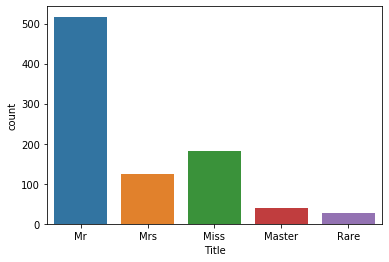

In [489]:
sns.countplot(x='Title', data=data);
plt.xticks(rotation=0)

In [490]:
data['Title']=data['Title'].map({
    'Mr':0,
    'Mrs':1,
    'Miss':2,
    'Master':3,
    'Rare':4
}).astype(int)

In [491]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [492]:
df=data.drop(['Ticket','Cabin'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [493]:
df=df.drop(['Name','PassengerId'],axis=1)

In [494]:
df['Sex']=df['Sex'].map({
    'male':1,
    'female':0
})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,0
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,0


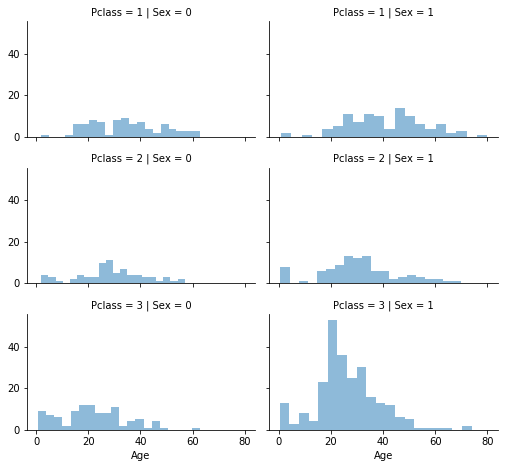

In [495]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [496]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [497]:
for i in range(len(df['Age'])):
    if df['Age'][i]<=16:
        df['Age'][i]=1
    elif df['Age'][i]>16 and df['Age'][i]<=32:
        df['Age'][i]=2
    elif df['Age'][i]>32 and df['Age'][i]<=48:
        df['Age'][i]=3
    elif df['Age'][i]>48 and df['Age'][i]<=64:
        df['Age'][i]=4
    else:
        df['Age'][i]=5
        

C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\S\Anaconda3\lib\site-packages\i

In [498]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,2.0,1,0,7.2500,S,0
1,1,1,0,3.0,1,0,71.2833,C,1
2,1,3,0,2.0,0,0,7.9250,S,2
3,1,1,0,3.0,1,0,53.1000,S,1
4,0,3,1,3.0,0,0,8.0500,S,0


In [499]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [500]:
df['FamilySize']=0
for i in range(len(df)):
    df['FamilySize'][i]=df['SibSp'][i]+df['Parch'][i]

C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [501]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
886,0,2,1,2.0,0,0,13.00,S,4,0
887,1,1,0,2.0,0,0,30.00,S,2,0
888,0,3,0,5.0,1,2,23.45,S,2,3
889,1,1,1,2.0,0,0,30.00,C,0,0
890,0,3,1,2.0,0,0,7.75,Q,0,0


In [502]:
df[['FamilySize','Survived']].groupby('FamilySize').mean().sort_values(by='Survived',ascending=False)

,Survived
FamilySize,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [503]:
df['IsAlone']=0
for i in range(len(df)):
    if df['FamilySize'][i]==1:
        df['IsAlone'][i]=1
    else:
        df['IsAlone'][i]=0

C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [504]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,2.0,1,0,7.2500,S,0,1,1
1,1,1,0,3.0,1,0,71.2833,C,1,1,1
2,1,3,0,2.0,0,0,7.9250,S,2,0,0
3,1,1,0,3.0,1,0,53.1000,S,1,1,1
4,0,3,1,3.0,0,0,8.0500,S,0,0,0


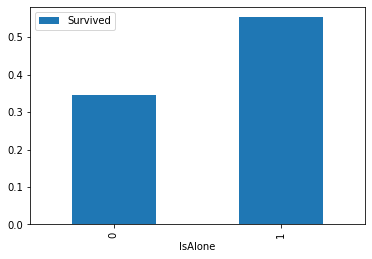

In [505]:
df[['IsAlone','Survived']].groupby('IsAlone').mean().plot(kind='bar')

In [506]:
df=df.drop(['Parch','SibSp','FamilySize'],axis=1)

In [507]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,2.0,7.2500,S,0,1
1,1,1,0,3.0,71.2833,C,1,1
2,1,3,0,2.0,7.9250,S,2,0
3,1,1,0,3.0,53.1000,S,1,1
4,0,3,1,3.0,8.0500,S,0,0


In [508]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
Title       0
IsAlone     0
dtype: int64

In [509]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [510]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
IsAlone     0
dtype: int64

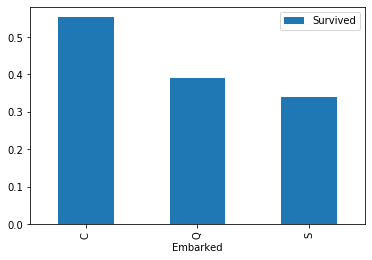

In [511]:
df[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by='Embarked',ascending=True).plot(kind='bar')

In [512]:
df['Embarked']=df['Embarked'].map({
    'S':0,
    'Q':1,
    'C':2
}).astype(int)

In [513]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,2.0,7.2500,0,0,1
1,1,1,0,3.0,71.2833,2,1,1
2,1,3,0,2.0,7.9250,0,2,0
3,1,1,0,3.0,53.1000,0,1,1
4,0,3,1,3.0,8.0500,0,0,0


In [514]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,0,3,1,2.0,7.2500,0,0,1,"(-0.001, 7.91]"
1,1,1,0,3.0,71.2833,2,1,1,"(31.0, 512.329]"
2,1,3,0,2.0,7.9250,0,2,0,"(7.91, 14.454]"
3,1,1,0,3.0,53.1000,0,1,1,"(31.0, 512.329]"
4,0,3,1,3.0,8.0500,0,0,0,"(7.91, 14.454]"


In [515]:
df[['FareBand','Survived']].groupby('FareBand').mean().sort_values(by='FareBand',ascending=False)

,Survived
FareBand,
"(31.0, 512.329]",0.581081
"(14.454, 31.0]",0.454955
"(7.91, 14.454]",0.303571
"(-0.001, 7.91]",0.197309


In [516]:
for i in range(len(df)):
    if df['Fare'][i]<=7.91:
        df['Fare'][i]=0
    elif df['Fare'][i]>7.91 and df['Fare'][i]<=14.454:
        df['Fare'][i]=1
    elif df['Fare'][i]>14.454 and df['Fare'][i]<=31.0:
        df['Fare'][i]=2
    else:
        df['Fare'][i]=3

C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\S\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C

In [517]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,0,3,1,2.0,0.0,0,0,1,"(-0.001, 7.91]"
1,1,1,0,3.0,3.0,2,1,1,"(31.0, 512.329]"
2,1,3,0,2.0,1.0,0,2,0,"(7.91, 14.454]"
3,1,1,0,3.0,3.0,0,1,1,"(31.0, 512.329]"
4,0,3,1,3.0,1.0,0,0,0,"(7.91, 14.454]"


In [518]:
df=df.drop('FareBand',axis=1)

In [519]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,2.0,0.0,0,0,1
1,1,1,0,3.0,3.0,2,1,1
2,1,3,0,2.0,1.0,0,2,0
3,1,1,0,3.0,3.0,0,1,1
4,0,3,1,3.0,1.0,0,0,0


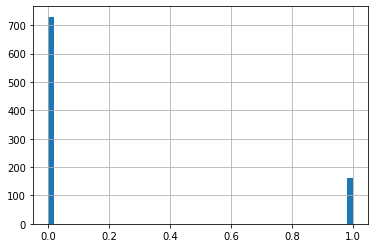

In [520]:
df.IsAlone.hist(bins=50)

In [521]:
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [522]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,Y,random_state=56)

In [523]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\S\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [524]:
from sklearn.metrics import accuracy_score
a_LR=accuracy_score(y_test,y_pred)
a_LR

0.852017937219731

In [525]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [526]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred1=svc.predict(x_test)
a_svc=accuracy_score(y_test,y_pred1)
a_svc

C:\Users\S\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.852017937219731

In [527]:
ens=RandomForestClassifier()
ens.fit(x_train,y_train)
y_pred2=ens.predict(x_test)
a_ens=accuracy_score(y_test,y_pred1)
a_ens

C:\Users\S\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.852017937219731

In [528]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)
a_knn=accuracy_score(y_test,y_pred3)
a_knn

0.8026905829596412

In [530]:
nv=GaussianNB()
nv.fit(x_train,y_train)
y_pred4=nv.predict(x_test)
a_nv=accuracy_score(y_test,y_pred4)
a_nv

0.8071748878923767

In [531]:
per=Perceptron()
per.fit(x_train,y_train)
y_pred5=per.predict(x_test)
a_per=accuracy_score(y_test,y_pred5)
a_per

0.6860986547085202

In [532]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred6=sgd.predict(x_test)
a_sgd=accuracy_score(y_test,y_pred6)
a_sgd

0.8475336322869955

In [533]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred7=dtc.predict(x_test)
a_dtc=accuracy_score(y_test,y_pred7)
a_dtc

0.8071748878923767

In [534]:
lsvc=LinearSVC()
lsvc.fit(x_train,y_train)
y_pred8=lsvc.predict(x_test)
a_lsvc=accuracy_score(y_test,y_pred8)
a_lsvc

C:\Users\S\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8699551569506726

In [538]:
models=pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [a_svc, a_knn, a_LR, 
              a_ens, a_nv, a_per, 
              a_sgd, a_lsvc, a_dtc]})
models.sort_values(by='Score', ascending=False)


,Model,Score
7,Linear SVC,0.869955
0,Support Vector Machines,0.852018
2,Logistic Regression,0.852018
3,Random Forest,0.852018
6,Stochastic Gradient Decent,0.847534
4,Naive Bayes,0.807175
8,Decision Tree,0.807175
1,KNN,0.802691
5,Perceptron,0.686099
